In [1]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.4.1 which is incompatible.


In [2]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import soundfile as sf
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense, LSTM
from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier, KerasRegressor
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
seed=7
np.random.seed(seed)
from matplotlib.pyplot import specgram
import glob
import IPython.display as ipd  # To play sound in the notebook
import pickle
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
RAVDESS = "/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/"
# Run one example
dir_list = os.listdir(RAVDESS)
dir_list[0:5]

['Actor_01',
 'Actor_04',
 'Actor_05',
 'Actor_02',
 'Actor_03',
 'Actor_08',
 'Actor_09',
 'Actor_07',
 'Actor_10',
 'Actor_06',
 'Actor_13',
 'Actor_14',
 'Actor_11',
 'Actor_15',
 'Actor_12',
 'Actor_16',
 'Actor_17',
 'Actor_19',
 'Actor_18',
 'Actor_20',
 'Actor_22',
 'Actor_24',
 'Actor_23',
 'Actor_21']

In [56]:
emotion_map = {
  "01": "Neutral",
  "02": "Calm",
  "03": "Happy",
  "04": "Sad",
  "05": "Angry",
  "06": "Fearful",
  "07": "Disgust",
  "08": "Surprised"
}

# Initialize a list to store rows of the DataFrame
data = []

# Loop through each directory and each file within the directory
for directory in dir_list:
    directory_path = os.path.join(RAVDESS, directory)
    if os.path.isdir(directory_path):
        for filename in os.listdir(directory_path):
            if filename.endswith(".wav"):
                # Extract the emotion abbreviation from the filename
                emo_abb = filename.split('-')[2]
                # print(emo_abb)
                # Get the emotion name from the emotion_map dictionary
                emotion = emotion_map.get(emo_abb, 'Unknown')
                # Full path to the audio file
                file_path = os.path.join(directory_path, filename)
                # Append the emotion and file path to the data list
                data.append([emotion, file_path])

    #         break
    # break

# Create a DataFrame from the data list
df = pd.DataFrame(data, columns=['emotion', 'path'])

In [60]:
df.head(5)

,emotion,path
0,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
1,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav
2,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav
3,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav
4,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav


In [61]:
csv_path='/content/drive/MyDrive/Dataset/metadata/Data_path.csv"'
df.to_csv(csv_path, index=False)

In [62]:
ref = pd.read_csv(csv_path)
ref.head(10)

,emotion,path
0,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav
1,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav
2,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav
3,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav
4,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav
5,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav
6,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav
7,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-02-01.wav
8,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-01-01.wav
9,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav


In [64]:
# ENSURE GENDER,EMOTION, AND ACTOR COLUMN VALUES ARE CORRECT
pd.set_option('display.max_colwidth', None)
df.sample(100)

,emotion,path
678,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_14/03-01-02-02-02-02-14.wav
399,Fearful,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_09/03-01-06-01-02-01-09.wav
65,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_04/03-01-03-01-02-02-04.wav
283,Disgust,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_03/03-01-07-02-01-01-03.wav
534,Disgust,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_10/03-01-07-01-02-02-10.wav
...,...,...
723,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_11/03-01-01-01-02-01-11.wav
393,Angry,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_09/03-01-05-02-01-01-09.wav
879,Fearful,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_12/03-01-06-01-02-02-12.wav
302,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_08/03-01-01-01-02-01-08.wav


<Axes: ylabel='count'>

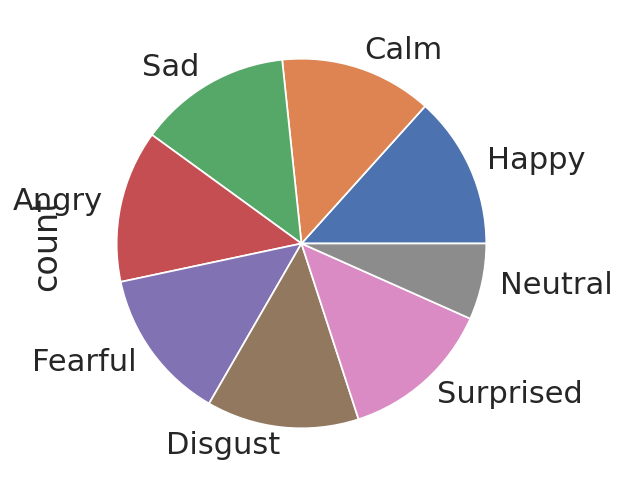

In [65]:
# LOOK AT DISTRIBUTION OF CLASSES
df.emotion.value_counts().plot(kind='pie')

In [66]:
!pip install resampy

In [67]:
import resampy
from resampy import resample
import librosa

In [68]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets
df = pd.DataFrame(columns=['Features'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,res_type='kaiser_fast'
                                  ,duration=3
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    result = np.array([])

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=20),
                    axis=0)
    result=np.hstack((result, mfccs)) # stacking horizontally

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)
    result=np.hstack((result, log_spectrogram)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=X).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    df.loc[counter] = [result]
    counter=counter+1


# Check a few records to make sure its processed successfully
print(len(df))
df.head()

1440


,Features
0,"[-42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.77083969116211, -42.763404846191406, -42.77083969116211, -42.77083969116211, -42.77083969116211, -41.01321792602539, -38.17333984375, -38.88338088989258, -37.252872467041016, -38.604820251464844, -37.929176330566406, -37.212406158447266, -37.12699508666992, -35.35064697265625, -35.88100051879883, -34.22755813598633, -33.56908416748047, -34.783897399902344, -34.55773162841797, -33.92683029174805, -34.335628509521484, -34.963768005371094, -35.713829040527344, -33.95722198486328, -32.48975372314453, -32.41221618652344, -33.59005355834961, -31.444896697998047, -23.730052947998047, -21.77307891845703, -21.968090057373047, -23.5643367767334, -20.599254608154297, -18.938486099243164, -19.434356689453125, -19.905517578125, -20.759212493896484, -20.141124725341797, -18.910646438598633, -19.476778030395508, -20.175031661987305, -19.828296661376953, -20.037334442138672, -19.84113883972168, -20.129384994506836, -19.870594024658203, -20.0723876953125, -18.389413833618164, -17.36699676513672, -17.117061614990234, -17.068561553955078, -18.035717010498047, -19.484840393066406, -20.364683151245117, -21.830354690551758, -20.778934478759766, -19.923837661743164, -19.788410186767578, -20.259902954101562, -23.017101287841797, -23.57485580444336, -21.314390182495117, -19.04761505126953, -19.17569923400879, -20.23826026916504, -21.123197555541992, -20.344648361206055, -19.640995025634766, -19.244464874267578, -18.827268600463867, -17.966449737548828, -18.120189666748047, -19.778757095336914, -21.42232322692871, -22.349327087402344, -22.286792755126953, -24.698286056518555, -21.925554275512695, -20.745532989501953, -20.186349868774414, -20.226825714111328, -18.43640899658203, -17.67032241821289, -18.739582061767578, -18.257997512817383, ...]"
1,"[-40.486759185791016, -40.18987274169922, -41.02556610107422, -38.12106704711914, -38.659000396728516, -39.931060791015625, -42.04250717163086, -42.50367736816406, -42.50367736816406, -42.50367736816406, -42.50367736816406, -42.50367736816406, -40.872589111328125, -37.48727035522461, -37.179725646972656, -39.56896209716797, -39.991085052490234, -41.981239318847656, -42.50367736816406, -42.50367736816406, -41.120147705078125, -39.121559143066406, -37.61784362792969, -37.68279266357422, -39.62609100341797, -38.0756721496582, -36.42928695678711, -36.310272216796875, -38.4293098449707, -33.56460189819336, -32.32402801513672, -31.452896118164062, -32.745513916015625, -34.80180740356445, -35.96213912963867, -36.454315185546875, -36.90683364868164, -38.59139633178711, -41.444034576416016, -37.428314208984375, -34.844844818115234, -32.323448181152344, -33.551544189453125, -33.025272369384766, -28.4394588470459, -25.19498062133789, -25.87380027770996, -27.43424415588379, -21.53384017944336, -18.950172424316406, -18.320341110229492, -19.07509994506836, -19.54924964904785, -18.75836181640625, -18.354061126708984, -19.382999420166016, -21.29022789001465, -21.912670135498047, -20.993011474609375, -21.106674194335938, -21.31930160522461, -21.165660858154297, -21.76616096496582, -21.243139266967773, -20.27829933166504, -20.725788116455078, -22.55292510986328, -19.902324676513672, -18.807453155517578, -19.20189666748047, -21.42721939086914, -21.82994270324707, -22.822162628173828, -23.599105834960938, -21.40091323852539, -18.508474349975586, -18.904050827026367, -19.610288619995117, -20.863065719604492, -18.90259552001953, -17.43882179260254, -17.78238868713379, -19.000125885009766, -18.644102096557617, -19.00676918029785, -19.09637451171875, -18.665477752685547, -18.679964065551758, -18.427867889404297, -18.026376724243164, -19.764171600341797, -21.661985397338867, -22.13620376586914, -22.334257125854492, -23.42

In [69]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['Features'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav,-40.486759,-40.189873,-41.025566,-38.121067,-38.659000,-39.931061,-42.042507,-42.503677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav,-42.782333,-42.782333,-42.782333,-42.782333,-42.769630,-42.782333,-42.782333,-42.601116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav,-41.458717,-40.824398,-41.100136,-41.468060,-41.262466,-37.448544,-36.728176,-39.218681,...,0.706927,0.729082,0.758905,0.004764,NaN,NaN,NaN,NaN,NaN,NaN
4,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav,-47.997208,-47.997208,-47.997208,-47.880608,-47.997208,-47.997208,-47.997208,-47.474091,...,0.746463,0.728650,0.735828,0.737532,0.772295,0.758041,0.726414,0.73435,0.756372,0.001797


In [70]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(1440, 533)


,emotion,path,0,1,2,3,4,5,6,7,...,521,522,523,524,525,526,527,528,529,530
0,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,-42.770840,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav,-40.486759,-40.189873,-41.025566,-38.121067,-38.659000,-39.931061,-42.042507,-42.503677,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav,-42.782333,-42.782333,-42.782333,-42.782333,-42.769630,-42.782333,-42.782333,-42.601116,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav,-41.458717,-40.824398,-41.100136,-41.468060,-41.262466,-37.448544,-36.728176,-39.218681,...,0.706927,0.729082,0.758905,0.004764,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav,-47.997208,-47.997208,-47.997208,-47.880608,-47.997208,-47.997208,-47.997208,-47.474091,...,0.746463,0.728650,0.735828,0.737532,0.772295,0.758041,0.726414,0.73435,0.756372,0.001797


In [71]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,521,522,523,524,525,526,527,528,529,530
1116,-36.560581,-35.199692,-35.552219,-36.262825,-37.949715,-36.491550,-37.089584,-37.907993,-37.844055,-38.159004,...,0.597486,0.691532,0.740533,0.008296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
156,-31.163132,-26.538208,-25.827368,-25.583511,-26.449203,-25.456295,-23.670574,-22.772854,-22.673626,-22.816050,...,0.632471,0.614842,0.614035,0.671671,0.620116,0.602233,0.608730,0.567285,0.634195,0.022836
575,-26.790943,-26.148930,-26.849524,-26.621288,-26.601490,-26.968592,-26.447369,-26.453186,-25.956095,-26.155527,...,0.338276,0.394061,0.433320,0.434391,0.504765,0.513498,0.480021,0.518560,0.594218,0.076311
598,-37.541649,-37.487823,-37.095085,-35.208385,-34.967678,-35.607109,-32.632214,-31.650766,-31.985703,-32.289795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
590,-24.403278,-23.709984,-23.019287,-22.699432,-23.140615,-23.778519,-24.334061,-24.572411,-24.826691,-25.307442,...,0.326805,0.506921,0.673075,0.621993,0.471752,0.460562,0.592356,0.600314,0.402430,0.090224
464,-32.831577,-32.449089,-32.022625,-31.911901,-32.365768,-32.796860,-32.254230,-31.467020,-30.910395,-31.220734,...,0.621877,0.580559,0.619466,0.014547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
390,-36.161160,-36.438099,-34.622383,-34.915554,-36.265125,-34.157829,-34.468842,-34.149017,-33.410660,-35.498440,...,0.666308,0.640711,0.658123,0.678012,0.721820,0.722596,0.703384,0.691047,0.742834,0.007109
581,-48.863262,-48.863262,-48.863262,-48.863262,-48.863262,-48.863262,-48.508564,-44.652821,-42.254112,-45.623703,...,0.520133,0.517434,0.520773,0.576862,0.625476,0.623911,0.653718,0.634823,0.628540,0.001521
820,-31.799860,-28.585953,-29.654993,-33.080860,-33.648083,-30.641079,-29.834385,-31.511435,-31.288040,-31.382086,...,0.612241,0.599403,0.601591,0.570588,0.614587,0.663816,0.693495,0.704867,0.677835,0.010309
1239,-33.148979,-33.148979,-33.148979,-32.707813,-32.716908,-33.148979,-33.113201,-33.104881,-32.660267,-29.228958,...,0.566485,0.615371,0.619742,0.656210,0.613480,0.620817,0.659854,0.725427,0.721094,0.023173


In [72]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
(1152, 531, 1)
(288, 531, 1)


In [73]:
lb.classes_

array(['Angry', 'Calm', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad',
       'Surprised'], dtype=object)

In [74]:
# ITERATE OVER ALL AUDIO FILES AND EXTRACT LOG MEL SPECTROGRAM MEAN VALUES INTO DF FOR MODELING
import pandas as pd
df_mel = pd.DataFrame(columns=['mel_spectrogram'])

counter=0

for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    #get the mel-scaled spectrogram (ransform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is kinda the log scale of amplitudes.)
    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000)
    db_spec = librosa.power_to_db(spectrogram)
    #temporally average spectrogram
    log_spectrogram = np.mean(db_spec, axis = 0)

    # Mel-frequency cepstral coefficients (MFCCs)
#     mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
#     mfcc=np.mean(mfcc,axis=0)

    # compute chroma energy (pertains to 12 different pitch classes)
#     chroma = librosa.feature.chroma_stft(y=X, sr=sample_rate)
#     chroma = np.mean(chroma, axis = 0)

    # compute spectral contrast
#     contrast = librosa.feature.spectral_contrast(y=X, sr=sample_rate)
#     contrast = np.mean(contrast, axis= 0)

    # compute zero-crossing-rate (zcr:the zcr is the rate of sign changes along a signal i.e.m the rate at
#     which the signal changes from positive to negative or back - separation of voiced andunvoiced speech.)
#     zcr = librosa.feature.zero_crossing_rate(y=X)
#     zcr = np.mean(zcr, axis= 0)

    df_mel.loc[counter] = [log_spectrogram]
    counter=counter+1

print(len(df_mel))
df_mel.head()

1440


,mel_spectrogram
0,"[-76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.38517, -76.36786, -76.37246, -76.38517, -76.38517, -76.17431, -75.719505, -75.94193, -75.64302, -75.90935, -75.831375, -75.751114, -74.78015, -72.83191, -71.263756, -66.52322, -66.22396, -70.02076, -72.22921, -72.31408, -73.10347, -73.701065, -74.247696, -72.630394, -70.08893, -71.00703, -71.96019, -64.493034, -45.909115, -40.03265, -41.116196, -43.53594, -40.619087, -35.054295, -32.517746, -32.09286, -32.51803, -33.53733, -33.267906, -35.378788, -40.179214, -42.37324, -43.332733, -42.33963, -40.890015, -37.123814, -35.46733, -33.28553, -32.94681, -32.99233, -33.490067, -35.945507, -41.89657, -47.815556, -50.323345, -45.50298, -38.28953, -38.66705, -41.103416, -41.81687, -42.414722, -41.487434, -39.02261, -35.519184, -33.715645, -33.54078, -34.01719, -34.092537, -32.436966, -31.850922, -33.650417, -38.193787, -42.978214, -45.402683, -45.206203, -44.58686, -45.937107, -45.795887, -40.709045, -37.87307, -38.022858, -38.164314, -39.509556, -41.684135, -42.94215, ...]"
1,"[-75.48293, -75.4404, -75.554375, -75.20429, -75.23087, -75.31972, -75.65414, -75.720375, -75.720375, -75.720375, -75.720375, -75.720375, -75.55636, -75.1184, -75.0596, -75.37099, -75.391594, -75.65218, -75.720375, -75.720375, -75.54746, -75.301704, -75.144135, -75.150276, -75.40712, -72.989395, -65.36437, -66.21635, -71.88308, -61.77353, -55.71276, -54.201763, -59.008724, -65.381035, -71.74732, -73.44525, -74.10868, -75.11392, -75.422935, -73.35708, -71.12269, -71.67145, -72.885124, -57.992264, -46.606167, -42.765457, -42.77682, -44.442326, -43.676636, -39.06736, -35.260796, -33.520035, -32.133297, -31.929964, -32.559666, -35.611877, -41.08123, -44.21871, -45.059032, -44.434967, -43.6203, -41.230057, -38.099014, -35.112717, -33.440674, -33.15926, -33.61406, -33.653507, -33.701817, -36.430912, -42.56046, -47.216526, -50.08694, -51.846832, -41.40661, -36.932133, -37.993782, -39.502655, -40.629604, -38.977577, -37.318096, -38.02609, -36.580303, -32.02303, -30.128885, -30.4522, -30.167246, -29.611923, -31.499458, -37.14612, -43.22088, -46.133022, -44.403244, -42.88012, -44.656788, -46.631077, -43.144543, -40.014843, -38.662434, -37.18039, ...]"
2,"[-75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.13967, -75.07232, -75.15079, -75.15079, -75.15079, -75.15079, -75.09946, -75.15079, -75.15079, -75.15079, -75.10913, -75.0942, -75.15079, -74.92831, -74.15182, -74.19854, -74.5156, -75.11962, -75.10407, -75.13173, -75.15079, -75.15079, -75.149956, -75.15079, -75.15079, -75.15079, -75.15079, -75.15079, -75.069115, -74.12111, -73.6178, -74.536125, -74.174065, -73.56252, -72.485245, -73.08493, -49.680977, -39.80165, -36.83088, -35.704613, -34.180256, -31.863138, -30.693201, -30.325674, -30.965343, -30.824118, -30.033846, -28.69082, -28.169176, -28.13898, -29.08207, -30.787987, -32.99949, -37.513935, -41.93026, -44.938816, -44.383423, -41.121216, -40.154804, -39.989162, -39.93824, -41.253056, -40.453785, -37.339134, -35.710888, -36.269848, -36.071182, -36.352654, -36.93645, -38.03055, -39.9, -40.52588, -41.243824, -41.382935, -40.334106, -38.54372, -39.558132, -40.66751, -37.1995, -32.581936, -32.73879, -33.55274, -37.30237, -43.40366, -39.87777, -35.74474, -34.765434, -34.003635, -33.998913, -34.424145, -35.477554, -38.35184, -41.040623, ...]"
3,"[-73.1249, -73.0588, -73.08624, -73.1249, -73.10836, -72.653725, -72.550224, -72.89737, -73.12111, -73.1249, -73.11411, -73.01177, -72.95354, -73.06865, -73.1249, -73.035, -72.99597, -73.04758, -72.946205, -73.05848, -73.1249, -73.1249, -73.1249, -73.07734, -72.804634, -69.65348, -69.219406, -71.91997, -72.16091, -72.68867, -72.86841, -72.87917, -72.91676, -72.91632, -72.44474, -72.66616, -72.63585, -72.61067, -72.47454, -71.707115, -71.65797, -71.75789, -48.666393, -40.956142, -40.45296, -42.667183, -43.889652, -42.

In [75]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df_mel['mel_spectrogram'].values.tolist())],axis=1)
df[:5]

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav,-75.482933,-75.440399,-75.554375,-75.204292,-75.230873,-75.319717,-75.654137,-75.720375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.139671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav,-73.124901,-73.058800,-73.086243,-73.124901,-73.108360,-72.653725,-72.550224,-72.897369,...,-73.123718,-73.124466,-73.01339,-73.007652,-73.011482,-73.019966,-73.043434,NaN,NaN,NaN
4,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.137138,...,-83.151360,-83.151360,-83.15136,-83.151360,-83.151360,-83.151360,-83.151360,-83.15136,-83.15136,-83.15136


In [76]:
# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','emotion'],axis=1)
                                                    , df.emotion
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
1116,-63.888676,-61.315659,-61.384037,-62.932713,-62.611786,-62.567101,-63.675915,-64.927994,-66.104370,-67.422371,...,-67.768463,-67.768463,-67.768463,-67.768463,-67.768463,-67.768463,-67.768463,NaN,NaN,NaN
156,-50.742004,-48.208965,-48.854023,-50.299961,-53.886215,-55.991100,-51.633751,-43.613411,-39.909512,-38.380478,...,-59.440887,-59.314484,-58.785400,-58.932323,-59.152351,-58.746716,-58.385677,-58.447769,-59.031700,-59.566219
575,-44.628872,-42.734760,-41.895649,-41.842293,-41.776321,-41.031528,-41.269878,-41.102421,-40.349506,-40.037281,...,-17.250116,-18.639668,-19.284460,-19.808056,-21.626047,-24.478834,-26.301504,-28.375399,-30.789860,-33.921303
598,-67.122238,-66.611458,-65.670845,-64.232956,-62.483986,-59.767845,-57.378746,-55.706738,-54.793358,-54.704144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,-42.453983,-41.092636,-40.976059,-40.627327,-40.623875,-40.974064,-40.209595,-39.940281,-39.928883,-40.265469,...,-42.659527,-43.080860,-43.096077,-43.218002,-43.356819,-43.305618,-43.585968,-44.005936,-43.663582,-44.517761
464,-60.295235,-59.741833,-59.468365,-59.443626,-59.463650,-59.625023,-59.248489,-59.245617,-59.516258,-59.855076,...,-60.539730,-60.603977,-60.618267,-60.618267,-60.613178,-60.605103,-60.607075,NaN,NaN,NaN
390,-67.774094,-67.820419,-67.644386,-67.675987,-67.801765,-67.598770,-67.585487,-67.604637,-67.523422,-67.721130,...,-66.691612,-66.840034,-66.680199,-66.940895,-66.620262,-66.546646,-66.605164,-66.429298,-66.403236,-67.143364
581,-85.100494,-85.100494,-85.100494,-85.100494,-85.100494,-85.100494,-85.078392,-84.731117,-84.039482,-84.833252,...,-79.799179,-78.329826,-78.524277,-81.060120,-81.437584,-81.284111,-83.180496,-82.607498,-78.753159,-78.749466
820,-64.847275,-64.661819,-64.838974,-65.173439,-65.229126,-64.924835,-64.835663,-65.041756,-65.021248,-65.027008,...,-65.464287,-65.404808,-65.480484,-65.564262,-64.616394,-64.073593,-63.785885,-64.072922,-63.475304,-63.539112
1239,-58.295406,-58.295406,-58.295406,-58.255505,-58.233418,-58.293636,-58.273525,-58.142269,-57.999500,-51.268833,...,-58.261002,-58.295406,-58.295406,-58.295406,-58.290627,-58.295013,-58.295406,-58.253685,-58.235786,-58.295406


In [77]:

# NORMALIZE DATA
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
# TURN DATA INTO ARRAYS FOR KERAS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
X_train = X_train[:,:,np.newaxis]
X_test = X_test[:,:,np.newaxis]

print(X_train.shape)
print(X_test.shape)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
(1152, 259, 1)
(288, 259, 1)


In [78]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv(csv_path,index=False)
data_path.head()

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav,-75.482933,-75.440399,-75.554375,-75.204292,-75.230873,-75.319717,-75.654137,-75.720375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.139671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav,-73.124901,-73.058800,-73.086243,-73.124901,-73.108360,-72.653725,-72.550224,-72.897369,...,-73.123718,-73.124466,-73.01339,-73.007652,-73.011482,-73.019966,-73.043434,NaN,NaN,NaN
4,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.137138,...,-83.151360,-83.151360,-83.15136,-83.151360,-83.151360,-83.151360,-83.151360,-83.15136,-83.15136,-83.15136


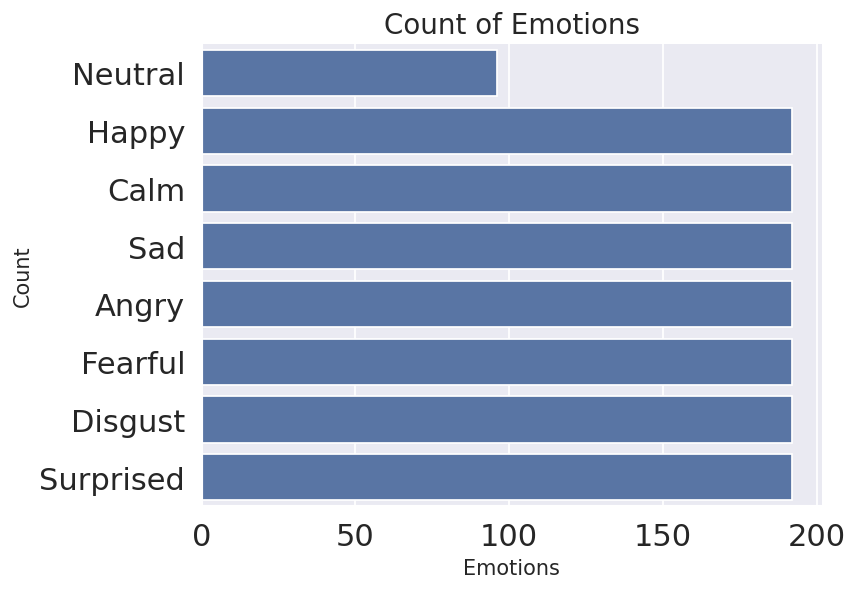

In [103]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [104]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [105]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [106]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [107]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    return result

In [84]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [85]:
len(X), len(Y), data_path.path.shape

(4320, 4320, (1440,))

In [86]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.321275,0.729664,0.750033,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,4.310902e-06,3.291511e-06,2.148075e-06,2.279739e-06,5.116492e-06,8.190280e-06,0.000007,0.000005,4.245835e-07,Neutral
1,0.242106,0.706744,0.756564,0.743562,0.734027,0.751419,0.707149,0.666838,0.702418,0.737094,...,4.313861e-06,3.300130e-06,2.172760e-06,2.303294e-06,5.135385e-06,8.213335e-06,0.000007,0.000005,4.412168e-07,Neutral
2,0.188227,0.622090,0.699117,0.753257,0.721177,0.701753,0.682364,0.662857,0.686512,0.734021,...,8.577035e-07,9.576477e-07,7.733598e-07,5.233060e-07,3.593583e-07,9.267893e-07,0.000002,0.000001,7.754233e-08,Neutral
3,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,6.984505e-06,7.034950e-06,6.654923e-06,6.979548e-06,1.214236e-05,9.640183e-06,0.000011,0.000006,4.254084e-07,Neutral
4,0.287720,0.735342,0.794982,0.770459,0.750688,0.764454,0.714061,0.638611,0.691553,0.714433,...,1.843624e-05,1.836998e-05,1.832395e-05,1.909229e-05,2.349949e-05,2.229174e-05,0.000023,0.000017,1.173303e-05,Neutral


In [87]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]
(3456, 155, 1)
(864, 155, 1)


(4320, 8)

In [88]:
lb.classes_

array(['Angry', 'Calm', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad',
       'Surprised'], dtype=object)

In [89]:
#Accuarte class labels

In [90]:
data_path = pd.concat([df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head(50)

,emotion,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,-76.385170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav,-75.482933,-75.440399,-75.554375,-75.204292,-75.230873,-75.319717,-75.654137,-75.720375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-01-01.wav,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.150787,-75.139671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Happy,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-03-01-01-01-01.wav,-73.124901,-73.058800,-73.086243,-73.124901,-73.108360,-72.653725,-72.550224,-72.897369,...,-73.123718,-73.124466,-73.013390,-73.007652,-73.011482,-73.019966,-73.043434,NaN,NaN,NaN
4,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.137138,...,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360,-83.151360
5,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-02-01.wav,-79.123436,-79.123436,-79.123436,-79.123436,-79.091682,-79.015129,-79.034721,-79.011864,...,-76.827530,-76.330978,-77.452744,-78.737953,-78.958054,-78.833527,-79.081268,-79.123436,-79.123436,-79.123436
6,Neutral,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,-75.268524,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-02-01.wav,-80.098640,-80.098640,-80.065361,-80.004349,-80.098640,-80.098640,-80.098640,-80.098640,...,-79.883743,-80.098640,-80.098640,-80.053177,-80.028328,-79.989746,-80.051186,-80.086296,-79.897255,-79.814224
8,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-01-01.wav,-83.731743,-83.731743,-83.731743,-83.731743,-83.300407,-83.375351,-83.731743,-83.731743,...,-67.309311,-68.202721,-70.755356,-70.574722,-70.424881,-72.304726,-73.052025,-75.970840,-78.340302,-77.661385
9,Calm,/content/drive/MyDrive/Dataset/Datasets/RAVDESS/archive (7)/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,-80.147774,...,-80.147774,-80.147774,-80.122353,-79.998413,-80.119652,-80.147774,-80.130814,-80.015106,-80.147774,-80.147774


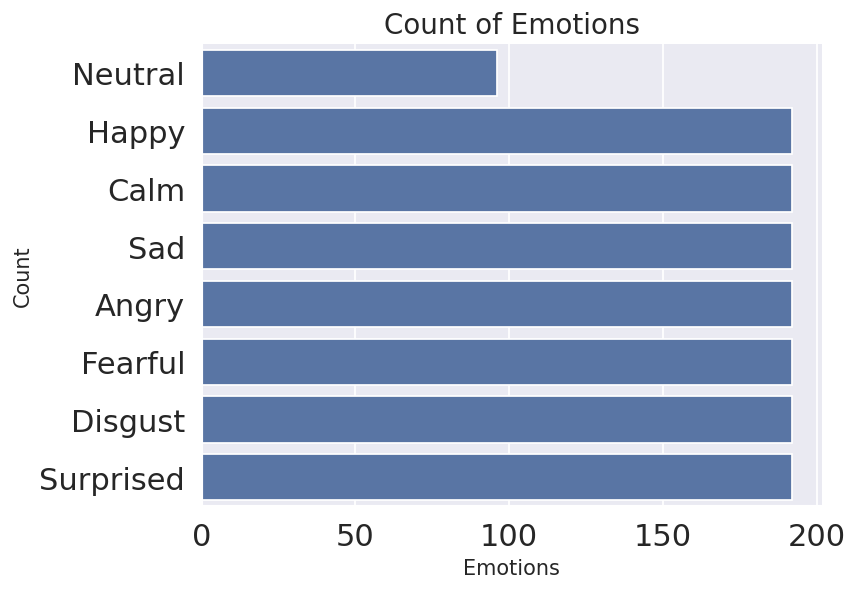

In [91]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [92]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

In [93]:
def noise(data):
    noise_amp = 0.015*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data,rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

def pitch2(data, sampling_rate, pitch_factor=0.6):
    return librosa.effects.pitch_shift(y=data,sr=sampling_rate,n_steps=pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.path)[1]
data, sample_rate = librosa.load(path)

In [94]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate,n_mfcc=13).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally

    return result

In [95]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    result = np.array([])

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch2(new_data, sample_rate)
    res4 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res4)) # stacking vertically

    return result

In [96]:
X, Y = [], []
for path, emotion in zip(df.path, df.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [97]:
len(X), len(Y), data_path.path.shape

(5760, 5760, (1440,))

In [98]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,labels
0,0.321275,0.729664,0.750033,0.730624,0.735275,0.713529,0.660531,0.684966,0.733049,0.753972,...,4.310902e-06,3.291511e-06,2.148075e-06,2.279739e-06,5.116492e-06,8.190280e-06,0.000007,5.051210e-06,4.245835e-07,Neutral
1,0.293263,0.776234,0.789137,0.770580,0.794180,0.785289,0.676627,0.665512,0.725526,0.755315,...,1.309366e-05,1.181115e-05,1.036190e-05,1.079403e-05,1.379472e-05,1.671194e-05,0.000016,1.428011e-05,9.286110e-06,Neutral
2,0.188227,0.622090,0.699117,0.753257,0.721177,0.701753,0.682364,0.662857,0.686512,0.734021,...,8.577035e-07,9.576477e-07,7.733598e-07,5.233060e-07,3.593583e-07,9.267893e-07,0.000002,1.133099e-06,7.754233e-08,Neutral
3,0.189066,0.636448,0.747205,0.767511,0.710410,0.715546,0.685453,0.631910,0.669231,0.711862,...,8.294818e-07,1.229046e-06,7.070142e-07,5.113823e-07,4.652324e-07,1.035976e-06,0.000002,9.115783e-07,9.691844e-08,Neutral
4,0.293566,0.673896,0.722096,0.723508,0.682302,0.680533,0.675352,0.628977,0.679179,0.707283,...,6.984505e-06,7.034950e-06,6.654923e-06,6.979548e-06,1.214236e-05,9.640183e-06,0.000011,5.543237e-06,4.254084e-07,Neutral


In [99]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = Features.iloc[: ,:-1].values
Y = Features['labels'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.20, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# NORMALIZE DATA
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

# TURN DATA INTO ARRAYS FOR KERAS
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
# ONE HOT ENCODE THE TARGET
# CNN REQUIRES INPUT AND OUTPUT ARE NUMBERS
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))
print(y_test[0:10])
# RESHAPE DATA TO INCLUDE 3D TENSOR
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

print(x_train.shape)
print(x_test.shape)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=2, shuffle=True)
acc_per_fold = []
loss_per_fold = []
inputs = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
inputs.shape
targets.shape



[[0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]
(4608, 155, 1)
(1152, 155, 1)


(5760, 8)

In [100]:
lb.classes_

array(['Angry', 'Calm', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad',
       'Surprised'], dtype=object)

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 201ms/step
Accuracy Score for model1 =  0.17447916666666666
Accuracy Score for model2 =  0.1918402777777778
Accuracy Score for model3 =  0.21006944444444445
Accuracy Score for average ensemble =  0.19444444444444445
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step
Weighted average method
Accuracy Score for model1 =  0.17447916666666666
Accuracy Score for model2 =  0.1918402777777778
Accuracy Score for model3 =  0.21006944444444445
Accuracy Score for average ensemble =  0.19444444444444445
Accuracy Score for weighted average ensemble =  0.18663194444444445
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step
Max ac

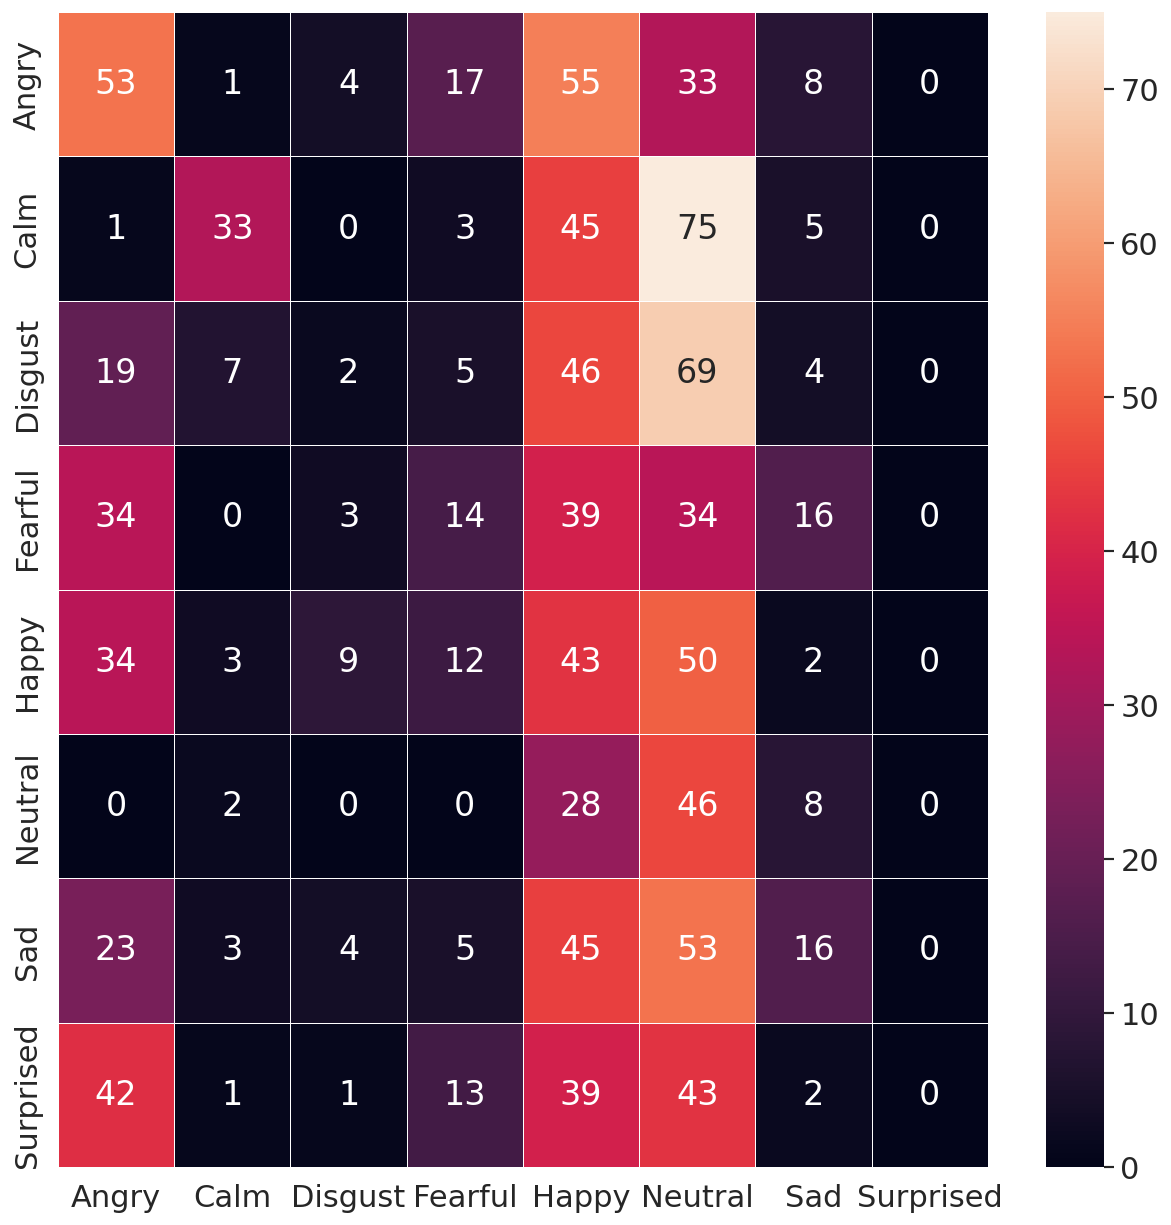

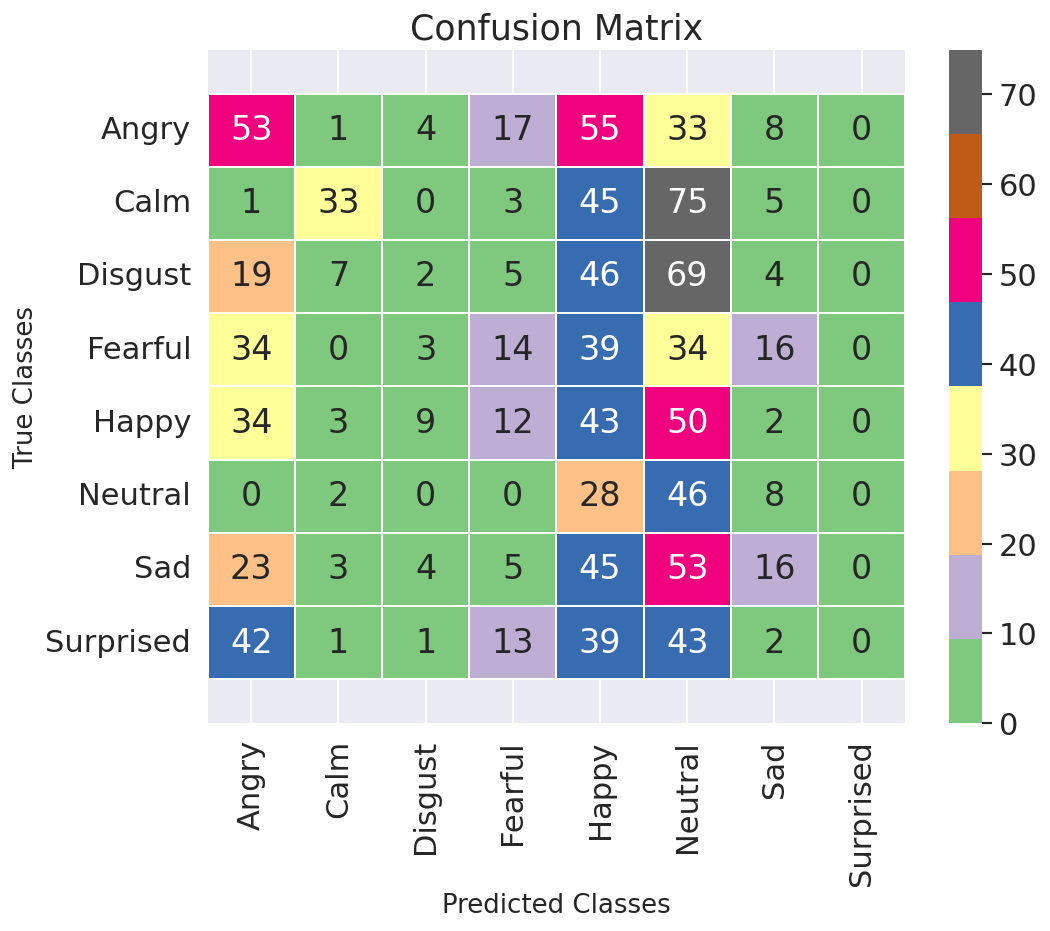

In [101]:
import random
#########################################################################
### Model average / sum Ensemble
# Simple sum of all outputs / predictions and argmax across all classes
########
from keras.models import load_model
from sklearn.metrics import accuracy_score

model1 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model1-emo-db.weights.h5')
model2 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model2-emo-db.weights.h5')
model3 = load_model('/content/drive/MyDrive/Dataset/models/german_models/model3-emo-db.weights.h5')

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(np.argmax(y_test, axis=1), prediction1)
accuracy2 = accuracy_score(np.argmax(y_test, axis=1), prediction2)
accuracy3 = accuracy_score(np.argmax(y_test, axis=1), prediction3)
ensemble_accuracy = accuracy_score(np.argmax(y_test, axis=1), ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.4, 0.2, 0.4]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

########################################
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
models = [model1, model2, model3]
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), wted_ensemble_pred)
            df = pd.concat([df, pd.DataFrame({'wt1':wts[0],'wt2':wts[1],
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0])], ignore_index=True)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[3], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2])




###########################################################################
### Explore metrics for the ideal weighted ensemble model.

models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.4, 0.1, 0.2]

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)



from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('emo-db-model-2.png')
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step
Weighted average method
Accuracy Score for model1 =  0.17447916666666666
Accuracy Score for model2 =  0.1918402777777778
Accuracy Score for model3 =  0.21006944444444445
Accuracy Score for average ensemble =  0.19444444444444445
Accuracy Score for weighted average ensemble =  0.1857638888888889


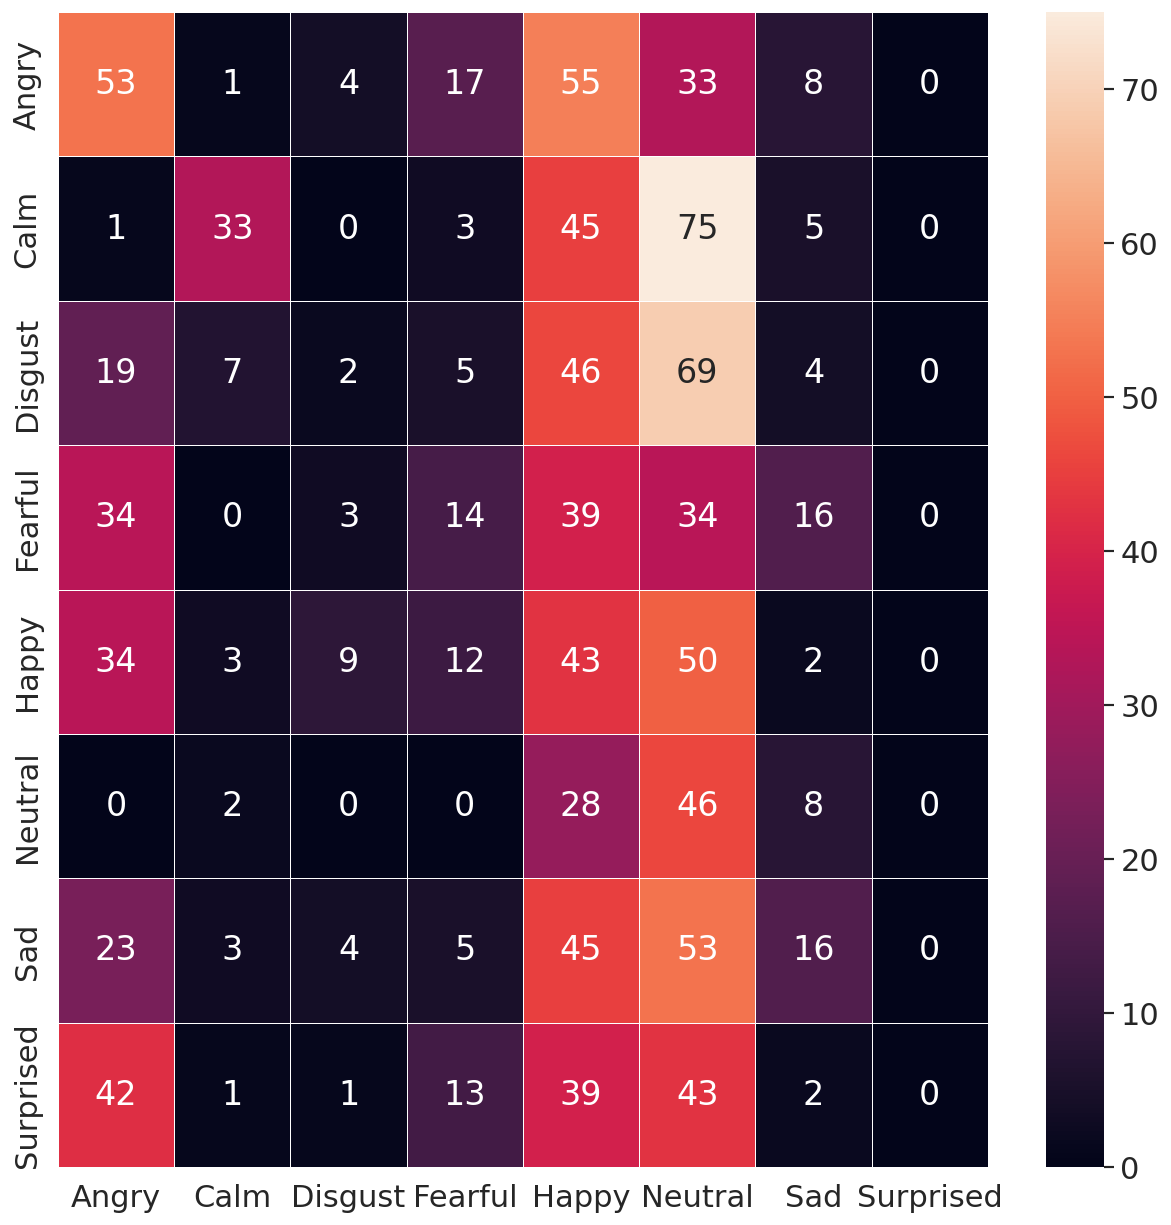

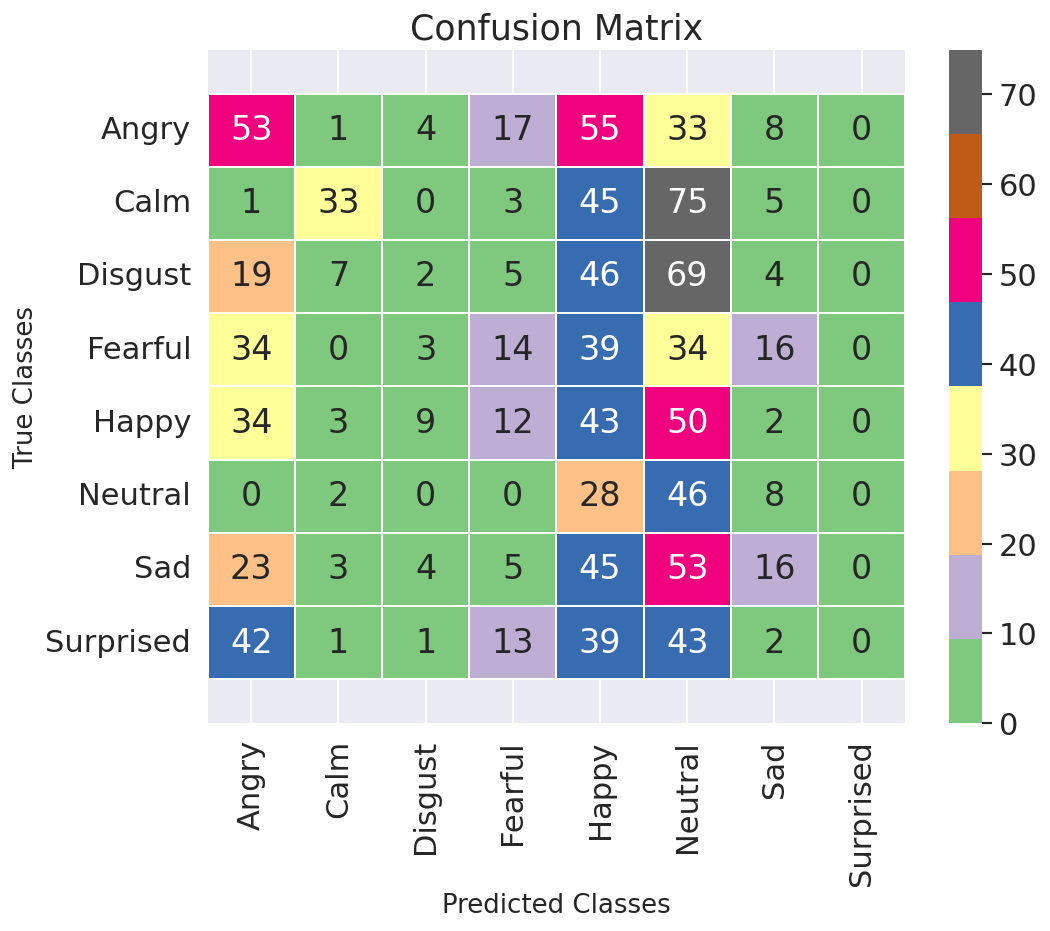

In [102]:
#Weighted average ensemble
models = [model1, model2, model3]
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
weights = [0.3, 0.1, 0.3]

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(np.argmax(y_test, axis=1), weighted_ensemble_prediction)
print('Weighted average method')
print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)


from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

# CREATE CONFUSION MATRIX OF ACTUAL VS. PREDICTION -SGD-MFCC
cm = confusion_matrix(np.argmax(y_test, axis=1), ideal_weighted_ensemble_prediction)
plt.figure(figsize = (9,7))
plt.rcParams['figure.dpi'] = 125
cm = pd.DataFrame(cm , index = [i for i in lb.classes_] , columns = [i for i in lb.classes_])
ax = sns.heatmap(cm, linecolor='white', cmap='Accent', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.6, top - 0.6)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Classes', size=15)
plt.ylabel('True Classes', size=15)
plt.savefig('SAVEE-EMSEMBLE.png')
plt.show()